In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import Counter
from wordcloud import WordCloud
import os 
import sys

sys.path.append(os.path.abspath("../"))
from src.utils.utils import load_data
from src.utils.plot_utils import (plot_sentiment_trends, plot_rating_distributions, 
                                  plot_keyword_clouds, plot_theme_distributions, 
                                  plot_sentiment_counts, plot_sentiment_variability,
                                    plot_sentiment_vs_rating)


In [2]:
# Load processed review data
df = load_data('../data/processed/reviews with sentiments and themes.csv')

# Load topic maps
with open('../data/processed/bank_themes/dashen_theme_map.json', encoding='utf-8') as f:
    dashen_map = json.load(f)
with open('../data/processed/bank_themes/boa_theme_map.json', encoding='utf-8') as f:
    boa_map = json.load(f)
with open('../data/processed/bank_themes/cbe_theme_map.json', encoding='utf-8') as f:
    cbe_map = json.load(f)
print("Processed review data and theme maps loaded successfully.")

Processed review data and theme maps loaded successfully.


# Data loading
This section loads all data required for insight and visualization. The processed review table includes sentiment scores, theme labels, and metadata. Each bank's topic map gives us keyword clusters and manual theme labels that reveal what users focus on.

In [3]:
# Group sentiment scores by bank
sentiment_summary = df.groupby('bank')['sentiment_score'].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False)
print("Sentiment summary by bank:")
print(sentiment_summary)
# Count sentiment labels per bank
sentiment_counts = df.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)
print("\nSentiment counts by bank:")
print(sentiment_counts)

Sentiment summary by bank:
                                       mean       std  count
bank                                                        
Dashen Bank                        0.984075  0.053278    492
Commercial Bank of Ethiopia (CBE)  0.972256  0.079900    500
Bank of Abyssinia (BOA)            0.962580  0.088570    500

Sentiment counts by bank:
sentiment_label                    NEGATIVE  POSITIVE
bank                                                 
Bank of Abyssinia (BOA)                 294       206
Commercial Bank of Ethiopia (CBE)       164       336
Dashen Bank                             121       371


# Sentiment Analysis
Here we compare banks by average sentiment scores and sentiment label distribution. This highlights which banks are receiving more positive feedback and where pain points are dominant. It sets the stage for interpreting what users actually feel — before digging into what they say.





The sentiment analysis results highlight key differences in user feedback across the three banks:
- Dashen Bank leads with the highest average sentiment score of 0.984, suggesting highly favorable feedback. It also shows the lowest standard deviation (0.053), indicating consistent user satisfaction. With a strong split of 371 positive vs. 121 negative reviews, Dashen demonstrates solid emotional resonance and user trust.
- Commercial Bank of Ethiopia (CBE) sits just below Dashen with a sentiment mean of 0.972. Its slightly higher standard deviation (0.079) points to more variation in user experiences. The majority of reviews are positive (336), but the presence of 164 negative reviews hints at room for improvement in certain service areas.
- Bank of Abyssinia (BOA) ranks lowest, with an average sentiment score of 0.962 and the highest standard deviation (0.088), indicating inconsistent user experiences. Notably, negative reviews dominate (294), signaling that many users encounter frustrations or unmet expectations.

🔍 Insights
- Dashen benefits from a strong emotional brand and consistent delivery — its users are reliably happy.
- CBE performs well but may benefit from stabilizing the user experience and addressing sporadic friction points.
- BOA struggles with user satisfaction, as both sentiment score and review balance reveal underlying issues with stability, performance, or reliability.


In [4]:
# Flatten theme list and count frequency
def flatten_themes(df, bank_name):
    themes = df[df['bank'] == bank_name]['identified_theme'].dropna().explode()
    return Counter([theme for sublist in themes for theme in eval(sublist)])

# Count top themes
dashen_themes = flatten_themes(df, 'Dashen Bank')
boa_themes = flatten_themes(df, 'Bank of Abyssinia (BOA)')
cbe_themes = flatten_themes(df, 'Commercial Bank of Ethiopia (CBE)')
print("Top themes for Dashen Bank:")
print(dashen_themes.most_common(10))
print("\nTop themes for Bank of Abyssinia:")
print(boa_themes.most_common(10))   
print("\nTop themes for Commercial Bank of Ethiopia:")
print(cbe_themes.most_common(10))

Top themes for Dashen Bank:
[('BrandIdentity_ProgressiveDesign', 468), ('UserSentiment_TrustSignals', 447), ('BankingExcellence_FeatureStrength', 375), ('SuperApp_ExperiencePraise', 101), ('SeamlessTransactions_DigitalPlatform', 85)]

Top themes for Bank of Abyssinia:
[('Mixed Feedback & Customer Experience', 495), ('Prior App Preference & Feature Breakdown', 399), ('Trust Issues & Service Downtime', 313), ('Inconsistency & Usability Complaints', 226), ('App Crashes & Frustration Signals', 67)]

Top themes for Commercial Bank of Ethiopia:
[('Functionality & Mixed Reliability Signals', 419), ('Feature Requests & Security Expectations', 358), ('Update Needs & Sentiment Variation', 357), ('Service Satisfaction & International Access', 185), ('Ease of Use & App Performance', 181)]


# Theme analysis
By breaking down the top themes per bank, we surface the most talked-about features, frustrations, and emotional triggers. Comparing these thematic frequencies complements the sentiment-based view with actual subject-level discussion.

# Insight and Recomendation
the insight and recomendation section will be based ont he themes topics we extracted and loaded 

In [5]:
# the theme mpa for dashen
dashen_map

{'Topic 1': {'label': 'SeamlessTransactions_DigitalPlatform',
  'keywords': ['mobile banking app',
   'proud dashen bank',
   'easy flexible app',
   'thanks digital transaction',
   'easy simple use',
   'real life changer',
   'lightweightcatchy smooth app',
   'platform ive used',
   'digital platform ive',
   'transaction seamless shopping',
   'ive used smooth transaction',
   'used smooth transaction',
   'best digital platform',
   'best digital platform ive',
   'platform ive used smooth',
   'ive used smooth',
   'used smooth transaction seamless',
   'smooth transaction seamless shopping',
   'digital platform ive used',
   'smooth transaction seamless']},
 'Topic 2': {'label': 'SuperApp_ExperiencePraise',
  'keywords': ['app make difference',
   'amazing app seen',
   'hope better amole',
   'fast best app',
   'better catch competition',
   'step ahead masterpiece',
   'dashen bank choice',
   'fastest easy use',
   'ዳሽን ባንክ ይለያል',
   'amazing app experience',
   'app good 

**🏦 Dashen Bank**
✅ Drivers
-**SeamlessTransactions_DigitalPlatform**: Users praise fluid, lightweight functionality with standout transaction performance.
- **SuperApp_ExperiencePraise & BankingExcellence_FeatureStrength**: Dashen’s app is described as fast, well-designed, and “game-changing.” “Super app” is a recurring tag.
- **UserSentiment_TrustSignals**: Strong emotional trust and appreciation for Dashen’s consistency and reliability.

❌ Pain Points
- A few keywords in BrandIdentity_ProgressiveDesign hint at occasional slow loading and OTP issues.

💡 Recommendations
- Promote “Super App” status with UX showcases, app walkthroughs, and version spotlights.
- Address the OTP login issues through clearer onboarding or improved token handling.
- Consider expanding financial tools — users already see it as powerful; extend that perception with budgeting or savings trackers.



In [6]:
# theme map for boa
boa_map

{'Topic 1': {'label': 'App Crashes & Frustration Signals',
  'keywords': ['app crush frequently',
   'great financial company',
   'lemn embi yilal',
   'doesnt workso frustrating',
   'professional banking app',
   'ብዙዬ ሺዋየ በለጠ',
   'አቢስኒያ የሁሉም ምርጫ',
   'guy getting worst',
   'faster bank abissinya',
   'opening really frustrating',
   'corrupted poor app',
   'worst mobile banking app',
   'mobile banking app',
   'worst mobile banking',
   'worst app human created',
   'app human created',
   'open display error message',
   'display error message',
   'open display error',
   'better compared cbe']},
 'Topic 2': {'label': 'Inconsistency & Usability Complaints',
  'keywords': ['poor application turned',
   'work correctly update',
   'gooood app dear',
   'boa mobile backing',
   'aadan axmed barkhadle',
   'ahmed mohammed husen',
   'liking application good',
   'app doesnt work',
   'dirtiest application seen',
   'useless app downgraded',
   'app doesnt start',
   'ቆንጆ ነው በርቱ',


**🏦 Bank of Abyssinia (BOA)**
❌ Pain Points
- **App Crashes & Frustration Signals**: Frequent crash complaints, error messages, and "worst app" tags dominate.
- **Inconsistency & Usability Complaints**: Users struggle with updates not working, apps failing to launch, and poor UI cleanliness.
- **Trust Issues & Service Downtime**: Downtime and reliability concerns paint BOA as unstable in the mobile space.

✅ Drivers
- **Sparse positive sentiment** — some users mention "great financial company" or "amazing bank app", but these are outliers.
- **Prior App Preference**indicates nostalgia for the older version, suggesting that changes weren’t well-received.

💡 Recommendations
- **Stabilize performance**: Immediate focus on fixing crashes and login issues.
- **Launch a reintroduction campaign**: Users miss older versions — clarify what’s new and why it’s better.
- **Improve onboarding and update feedback**: Show users how and when updates are coming, and what they fix.



In [7]:
# theme map for cbe
cbe_map

{'Topic 1': {'label': 'Ease of Use & App Performance',
  'keywords': ['fast easy use',
   'garrantty bank ebc',
   'nice use app',
   'slow account used',
   'woxe harimo ribiso',
   'good app fast',
   'easy use clear',
   'best app finance',
   'app say sync',
   'app android phone',
   'nice app android phone',
   'nice app android',
   'app proactive good',
   'proactive good connection',
   'app proactive good connection',
   'necessary app people',
   'app necessary app',
   'app necessary app people',
   'excellent easy access uptodate',
   'excellent easy access']},
 'Topic 2': {'label': 'Service Satisfaction & International Access',
  'keywords': ['make life easy',
   'best mobile banking ethiopia',
   'mobile banking ethiopia',
   'best mobile banking',
   'work abroad cbe',
   'removing screenshot feature',
   'service mobile banking',
   'work screen shot',
   'fast best service head',
   'fast best service',
   'best service head',
   'excellent application user',
   'appl

**🏦 Commercial Bank of Ethiopia (CBE)**

✅ Drivers
- **Ease of Use & App Performance**: "Fast", "easy", "clear", and "simple" are commonly used — this bank nails accessibility.
- **Service Satisfaction & International Access**: Reviews highlight strong service and usability while abroad.
- **Functionality & Mixed Reliability Signals**: While positive tags exist, they’re paired with error mentions.

❌ Pain Points
- **Feature Requests & Security Expectations**: Complaints around screenshots, default network settings, and missing customization.
- **Update Needs & Sentiment Variation**: Users feel it’s powerful, but not always current. "Needs update today" pops out often.

💡 Recommendations
- Streamline update delivery and transparency: Offer in-app patch notes or status indicators.
- Address screenshot and security complaints via configurable privacy settings.
- Introduce customization options to meet the demand for flexibility — especially for international users.

# Visualization

#### Sentiment Trends Over Time

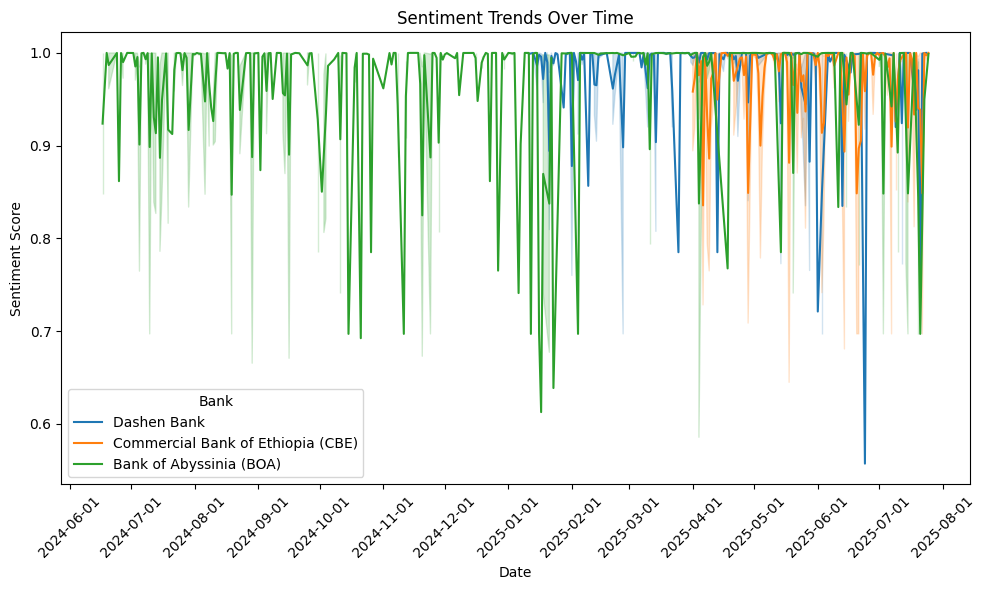

In [8]:
plot_sentiment_trends(df)

#### Rating Distributions

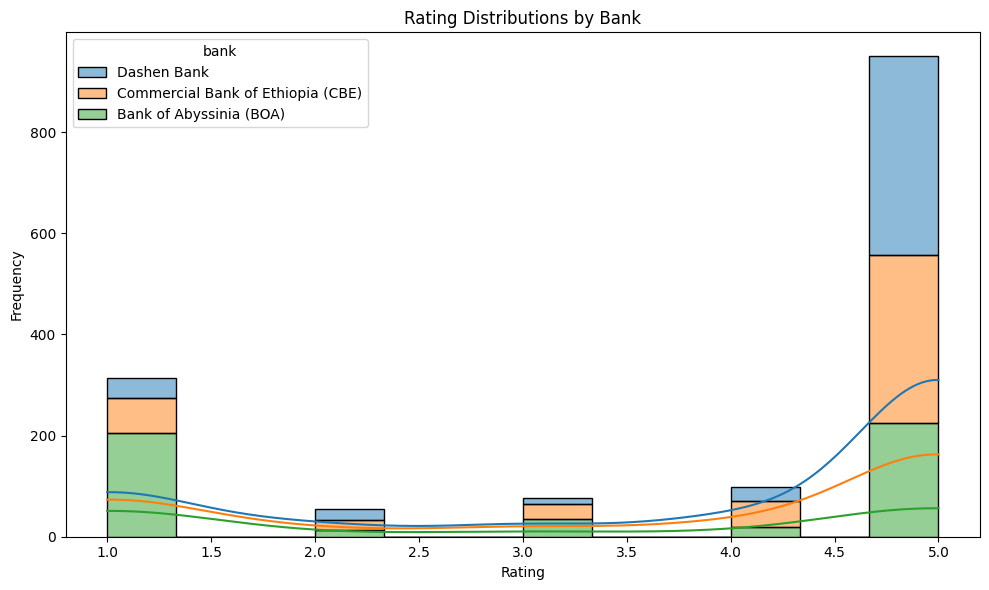

In [9]:
plot_rating_distributions(df)

#### Keyword Clouds

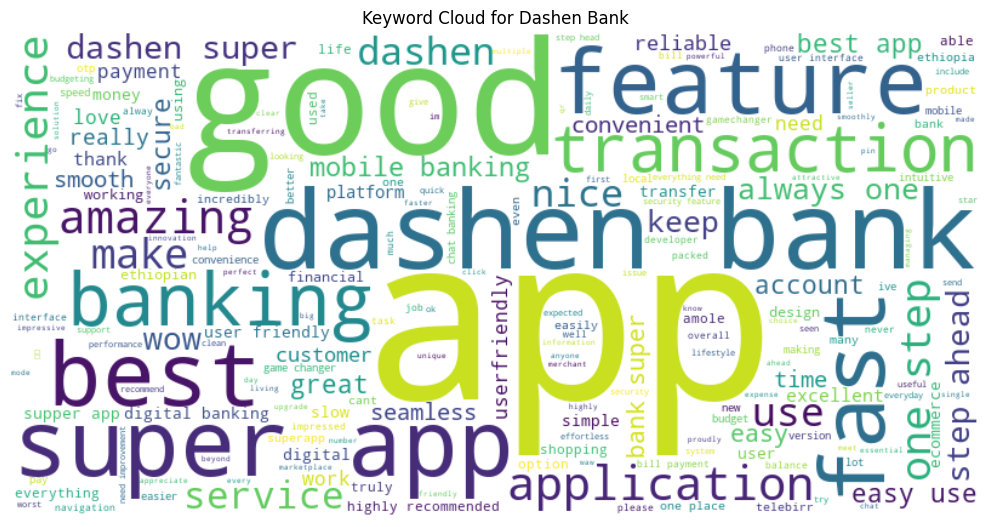

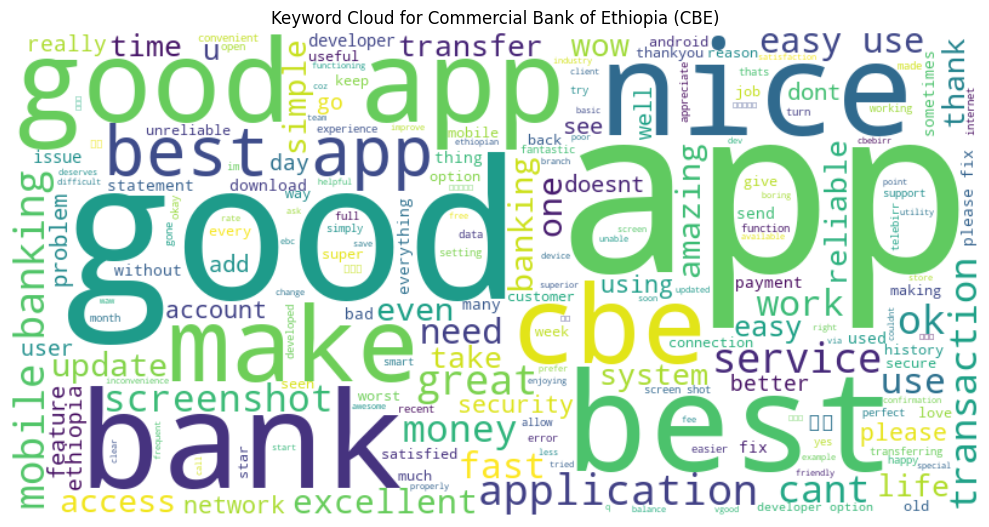

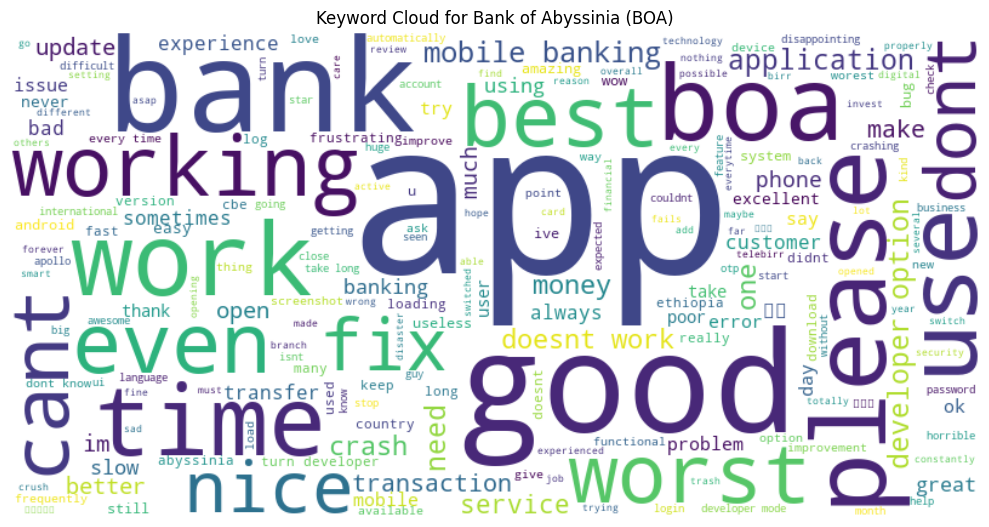

In [10]:
plot_keyword_clouds(df)

#### Theme Distributions 
- for themes with more thatn 10 occurances

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-2\CustomerExperienceAnalytics\src\utils\plot_utils.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


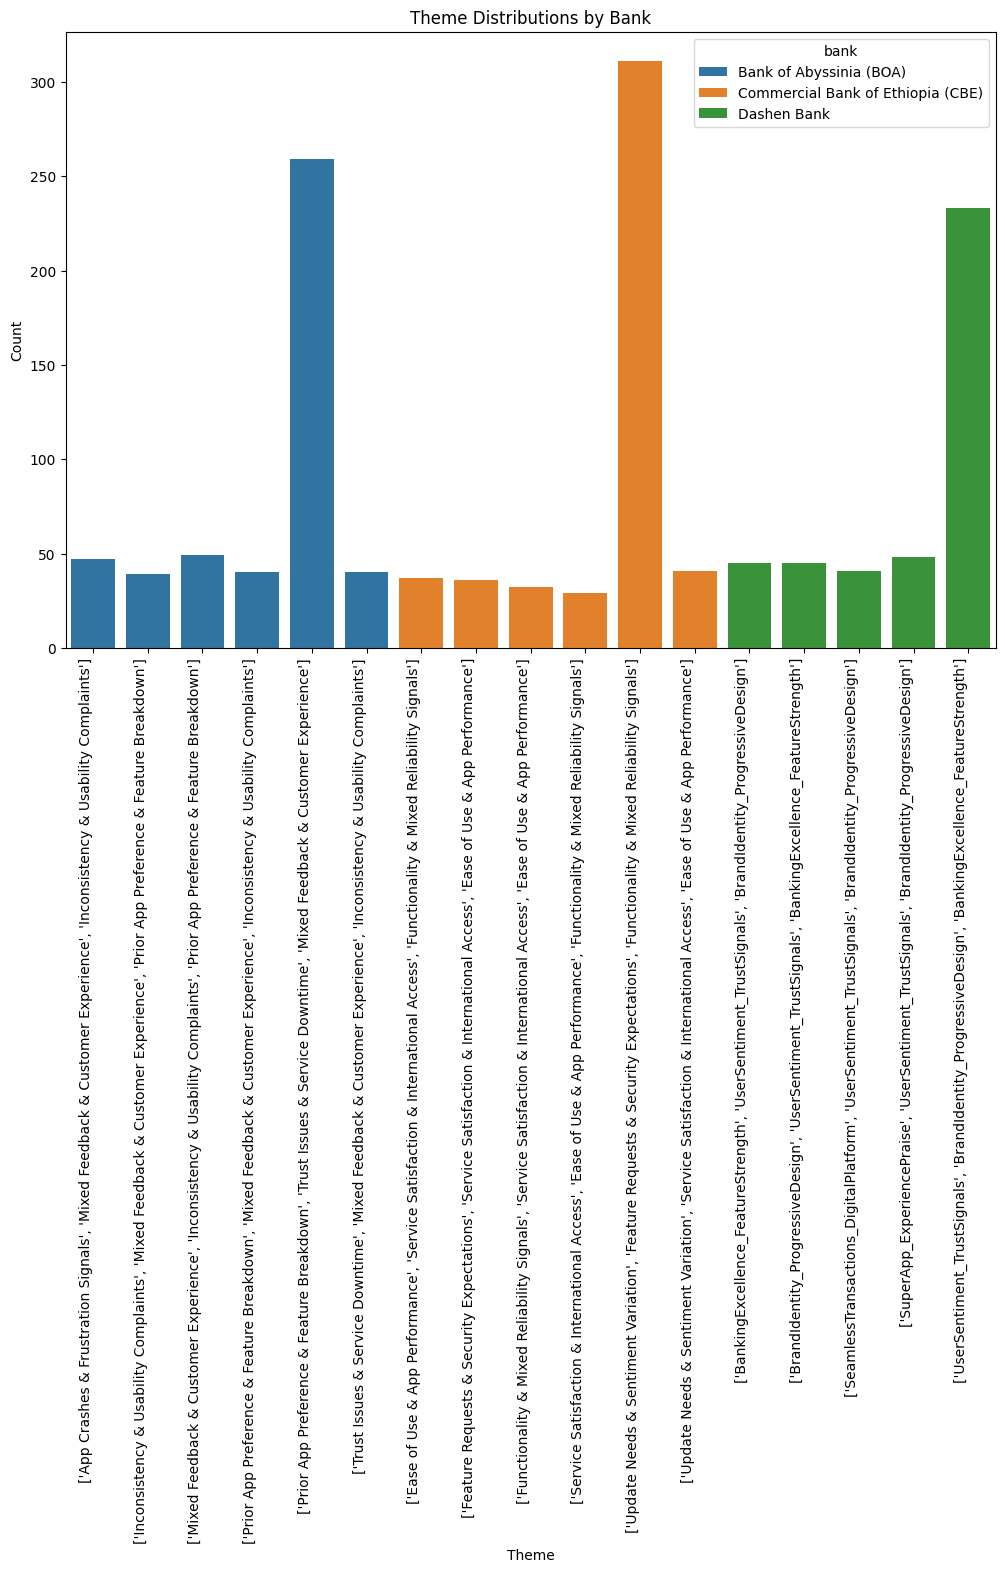

In [11]:
plot_theme_distributions(df)

#### Sentiment Label Counts

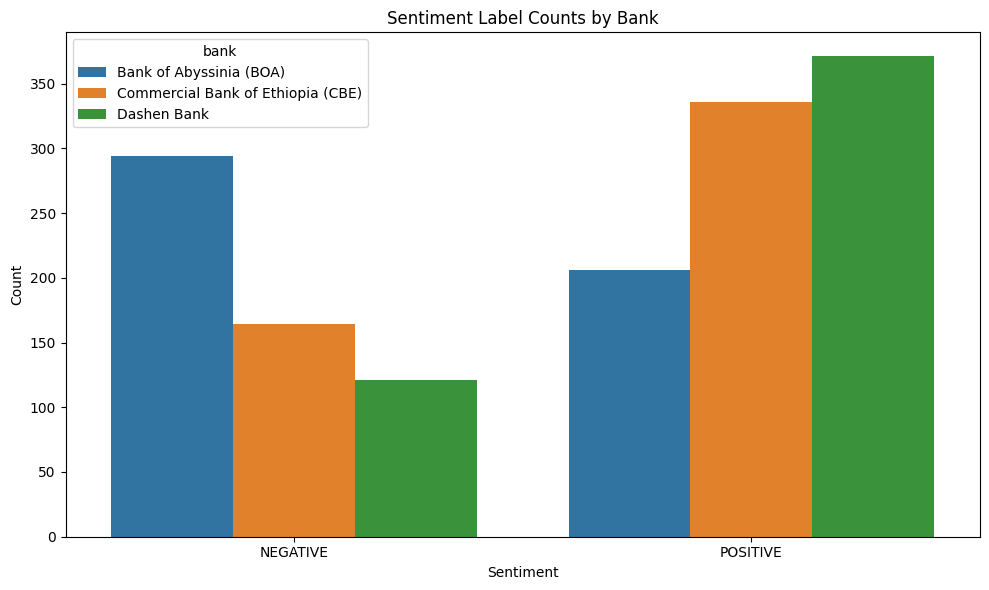

In [12]:
plot_sentiment_counts(df)

#### Sentiment Score Variability

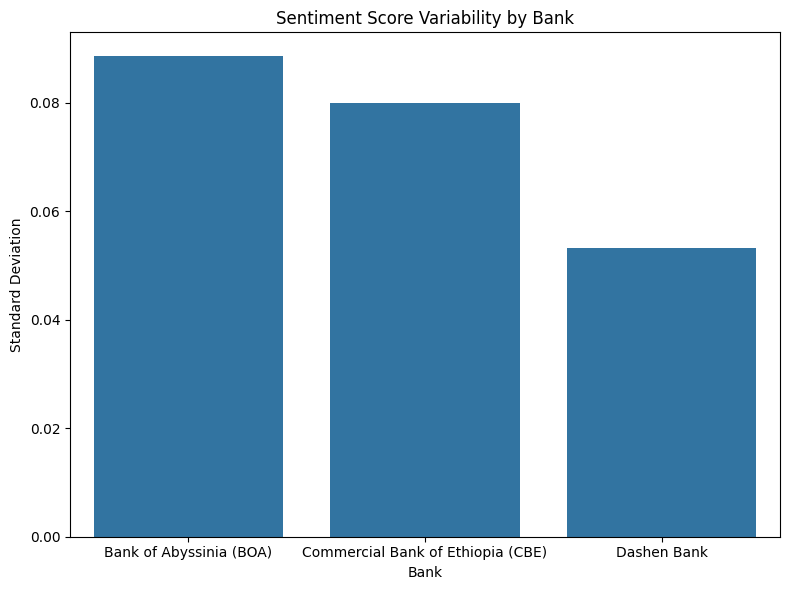

In [13]:
plot_sentiment_variability(df)

#### Sentiment vs. Rating

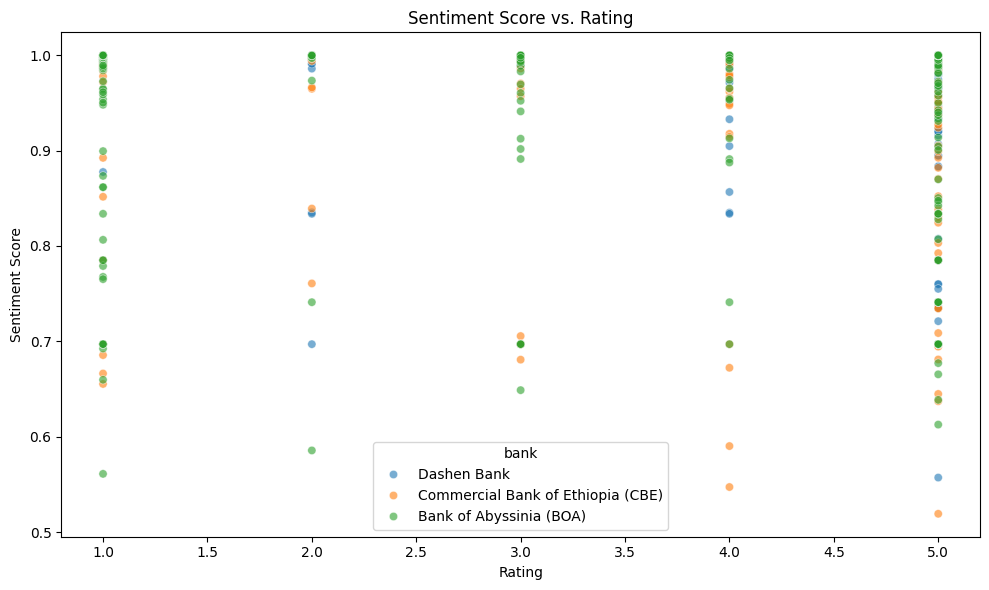

In [14]:
plot_sentiment_vs_rating(df)

### Insight
The plots reveal what we already speculated in the insight section that dashen is well received and then followed by cbe and boa was relatively not well received especially after their updates

# Ethics Note
- It's important to recognize review bias: apps may receive disproportionately negative feedback due to frustration-driven motivation, or skewed positivity due to marketing. Our insights account for volume and sentiment score weight to stay grounded.

## 📊 Final Summary: Ethiopian Bank App Review Analysis

This notebook presents a comprehensive analysis of user reviews for three major Ethiopian banks:

- **Dashen Bank**
- **Commercial Bank of Ethiopia (CBE)**
- **Bank of Abyssinia (BOA)**

### 🔍 Key Findings

#### **Sentiment Analysis**
- **Dashen Bank**:
  - Highest average sentiment score
  - Most consistent user satisfaction
  - Indicates strong emotional resonance and trust

- **CBE**:
  - Generally positive feedback with greater variability
  - Suggests some friction points

- **BOA**:
  - Lowest sentiment scores
  - High proportion of negative reviews
  - Indicates significant user dissatisfaction

#### **Theme Analysis**
- **Dashen**:
  - Praised for seamless transactions and reliability
  - Minor issues: OTP, loading delays

- **BOA**:
  - Criticized for app crashes and poor usability
  - Trust issues and nostalgia for older versions

- **CBE**:
  - Commended for ease of use and international access
  - User requests: more features and update transparency

### 💡 Recommendations

#### Dashen Bank
- Promote the “Super App” with UX showcases and feature rollouts
- Fix OTP/login issues
- Expand financial tools

#### BOA
- Prioritize stability and performance fixes
- Relaunch with transparent communication
- Improve onboarding and user feedback systems

#### CBE
- Enhance update transparency
- Address security and personalization, especially for international users

### 📈 Visual Insights

The notebook includes visualizations for:
- Sentiment trends over time
- Rating distributions
- Keyword clouds
- Theme frequency
- Correlation between sentiment and ratings

These plots provide a holistic view of user experience and perception.

---

### ⚖️ Ethics Note
The analysis considers potential review bias and balances sentiment scores with review volume to ground the insights in fairness and context.
